In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("University_Clustering.xlsx")

print(df)

            Univ State   SAT  Top10  Accept  SFRatio  Expenses  GradRate
0          Brown    RI  1310     89      22       13     22704        94
1        CalTech    CA  1415    100      25        6     63575        81
2            CMU    PA  1260     62      59        9     25026        72
3       Columbia    NY  1310     76      24       12     31510        88
4        Cornell    NY  1280     83      33       13     21864        90
5      Dartmouth    NH  1340     89      23       10     32162        95
6           Duke    NC  1315     90      30       12     31585        95
7     Georgetown    DC  1255     74      24       12     20126        92
8        Harvard    MA  1400     91      14       11     39525        97
9   JohnsHopkins    MD  1305     75      44        7     58691        87
10           MIT    MA  1380     94      30       10     34870        91
11  Northwestern    IL  1260     85      39       11     28052        89
12     NotreDame    IN  1255     81      42       1

In [3]:
df.drop("State",axis=1, inplace=True)
df_new = df.drop("Univ", axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler
for col in df_new:
    ss = StandardScaler()
    df_new[col]= ss.fit_transform(df_new[[col]])

In [5]:
df_new.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


In [7]:
z = linkage(df_new, method = "complete", metric = "euclidean")

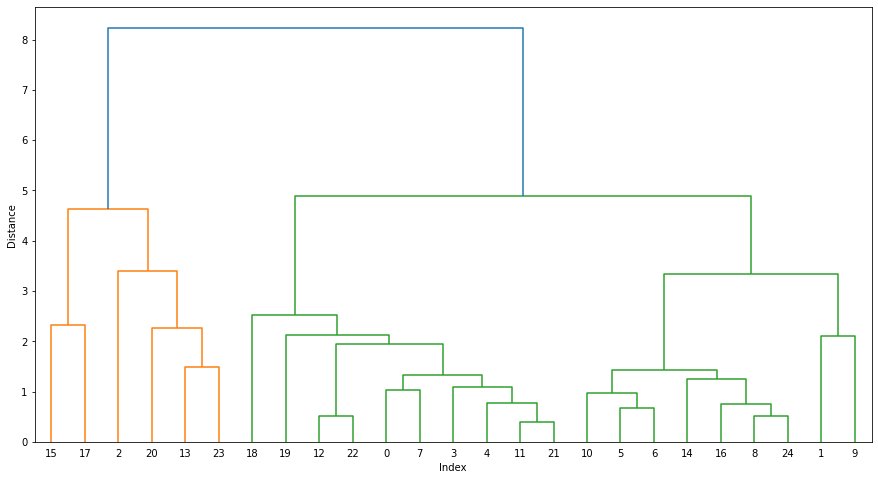

In [11]:
plt.figure(figsize=(15, 8))
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 3, linkage = 'complete', affinity = "euclidean")
model.fit(df_new)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [13]:
model.labels_

array([2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 2, 0, 2,
       2, 0, 1], dtype=int64)

In [14]:
df["labels"] = model.labels_

In [15]:
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,labels
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,1
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [16]:
df.groupby("labels").mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
labels,,,,,,
0,1114.333333,47.000000,67.833333,17.000000,13384.666667,74.000000
1,1362.777778,90.555556,24.333333,9.666667,41176.888889,92.222222
2,1271.000000,81.500000,35.400000,12.900000,23380.000000,89.400000


In [17]:
df[df["labels"]==2]["Univ"]

0            Brown
3         Columbia
4          Cornell
7       Georgetown
11    Northwestern
12       NotreDame
18      UCBerkeley
19        UChicago
21           UPenn
22             UVA
Name: Univ, dtype: object

In [18]:
df[df["labels"]==0]["Univ"]

2            CMU
13     PennState
15        Purdue
17      TexasA&M
20     UMichigan
23    UWisconsin
Name: Univ, dtype: object

In [19]:
df[df["labels"]==1]["Univ"]

1          CalTech
5        Dartmouth
6             Duke
8          Harvard
9     JohnsHopkins
10             MIT
14       Princeton
16        Stanford
24            Yale
Name: Univ, dtype: object